<a href="https://colab.research.google.com/github/thanhtruchhh/Glassdoor_Analysis/blob/main/Data_Science_Job_Posting_on_Glassdoor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import package & load data


In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
link = '/content/drive/MyDrive/Dataset/Data Science Job Posting on Glassdoor/Uncleaned_DS_jobs.csv'
df = pd.read_csv(link)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [3]:
df.shape

(672, 15)

In [4]:
df.dtypes

index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [5]:
df.isna().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [6]:
na = df[df.applymap(lambda x: x == -1 or x == '-1')].count().reset_index()
na.columns = ['column name', 'cnt_na']
na['pct_na'] = na['cnt_na'] / df.shape[0]
na.sort_values(by = 'cnt_na',ascending = False)

,column name,cnt_na,pct_na
14,Competitors,501,0.745536
9,Founded,118,0.175595
11,Industry,71,0.105655
12,Sector,71,0.105655
4,Rating,50,0.074405
7,Headquarters,31,0.046131
8,Size,27,0.040179
10,Type of ownership,27,0.040179
13,Revenue,27,0.040179
0,index,0,0.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,index,Rating,Founded
count,672.000000,672.000000,672.000000
mean,335.500000,3.518601,1635.529762
std,194.133974,1.410329,756.746640
min,0.000000,-1.000000,-1.000000
25%,167.750000,3.300000,1917.750000
50%,335.500000,3.800000,1995.000000
75%,503.250000,4.300000,2009.000000
max,671.000000,5.000000,2019.000000


In [9]:
df['Salary Estimate'].unique()

array(['$137K-$171K (Glassdoor est.)', '$75K-$131K (Glassdoor est.)',
       '$79K-$131K (Glassdoor est.)', '$99K-$132K (Glassdoor est.)',
       '$90K-$109K (Glassdoor est.)', '$101K-$165K (Glassdoor est.)',
       '$56K-$97K (Glassdoor est.)', '$79K-$106K (Glassdoor est.)',
       '$71K-$123K (Glassdoor est.)', '$90K-$124K (Glassdoor est.)',
       '$91K-$150K (Glassdoor est.)', '$141K-$225K (Glassdoor est.)',
       '$145K-$225K(Employer est.)', '$79K-$147K (Glassdoor est.)',
       '$122K-$146K (Glassdoor est.)', '$112K-$116K (Glassdoor est.)',
       '$110K-$163K (Glassdoor est.)', '$124K-$198K (Glassdoor est.)',
       '$79K-$133K (Glassdoor est.)', '$69K-$116K (Glassdoor est.)',
       '$31K-$56K (Glassdoor est.)', '$95K-$119K (Glassdoor est.)',
       '$212K-$331K (Glassdoor est.)', '$66K-$112K (Glassdoor est.)',
       '$128K-$201K (Glassdoor est.)', '$138K-$158K (Glassdoor est.)',
       '$80K-$132K (Glassdoor est.)', '$87K-$141K (Glassdoor est.)',
       '$92K-$155K (Glassdo

In [10]:
ratings = df['Rating'].unique()
ratings.sort()
print(ratings)

[-1.   2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2
  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6
  4.7  4.8  4.9  5. ]


In [11]:
df['Location'].unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Remote',
       'Memphis, TN', 'Plano, TX', 'West Grove, PA', 'Phoenix, AZ',
       'Appleton, WI', 'Atlanta, GA', 'Orlando, FL', 'Lexington, MA',
       'McLean, VA', 'San Francisco, CA', 'Sheboygan, WI',
       'United States', 'Bothell, WA', 'Lincoln, NE', 'Overland Park, KS',
       'Santa Monica, CA', 'Portsmouth, NH', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Bellevue, WA',
       'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN', 'Woburn, MA',
       'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
 

In [12]:
df['Headquarters'].unique()

array(['New York, NY', 'Herndon, VA', 'Boston, MA',
       'Bad Ragaz, Switzerland', 'Santa Barbara, CA',
       'Basel, Switzerland', 'Bedford, MA', 'Mountain View, CA',
       'Chicago, IL', 'Mc Lean, VA', 'Saint Louis, MO', 'Richland, WA',
       'Northbrook, IL', 'Princeton, NJ', 'Mays Landing, NJ',
       'Washington, DC', 'Memphis, TN', 'Tempe, AZ', 'Reading, PA',
       'San Francisco, CA', 'Menlo Park, CA', 'Atlanta, GA',
       'Orlando, FL', 'Lexington, MA', 'Falls Church, VA',
       'Sheboygan, WI', 'Seattle, WA', 'Bellevue, WA', 'Lincoln, NE',
       'Chantilly, VA', 'Santa Monica, CA', 'Ewing, NJ',
       'South San Francisco, CA', 'Palo Alto, CA', 'Singapore, Singapore',
       'Cambridge, MA', 'OSAKA, Japan', 'Santa Clara, CA', 'Vienna, VA',
       'New Orleans, LA', 'Akron, OH', 'Zurich, Switzerland',
       'Woburn, MA', 'Carson, CA', 'Coral Gables, FL', 'San Ramon, CA',
       'Brisbane, CA', 'Winter Park, FL', 'San Rafael, CA',
       'Deerfield, IL', 'Ipswich, MA',

In [13]:
df['Job Title'].value_counts()

Data Scientist                                            337
Data Engineer                                              26
Senior Data Scientist                                      19
Machine Learning Engineer                                  16
Data Analyst                                               12
                                                         ... 
Data Science Instructor                                     1
Business Data Analyst                                       1
Purification Scientist                                      1
Data Engineer, Enterprise Analytics                         1
AI/ML - Machine Learning Scientist, Siri Understanding      1
Name: Job Title, Length: 172, dtype: int64

In [14]:
df['Size'].value_counts()

51 to 200 employees        135
1001 to 5000 employees     104
1 to 50 employees           86
201 to 500 employees        85
10000+ employees            80
501 to 1000 employees       77
5001 to 10000 employees     61
-1                          27
Unknown                     17
Name: Size, dtype: int64

In [15]:
df['Type of ownership'].value_counts()

Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
-1                                 27
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: Type of ownership, dtype: int64

In [16]:
df['Sector'].value_counts()

Information Technology                188
Business Services                     120
-1                                     71
Biotech & Pharmaceuticals              66
Aerospace & Defense                    46
Finance                                33
Insurance                              32
Manufacturing                          23
Health Care                            21
Government                             17
Oil, Gas, Energy & Utilities           10
Retail                                  7
Telecommunications                      7
Transportation & Logistics              6
Media                                   5
Real Estate                             3
Travel & Tourism                        3
Agriculture & Forestry                  3
Education                               3
Accounting & Legal                      3
Construction, Repair & Maintenance      2
Consumer Services                       2
Non-Profit                              1
Name: Sector, dtype: int64

In [17]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: Revenue, dtype: int64

* The dataset has 672 rows, 12 columns.
* There are 13 duplicate rows.
* There are no missing values in the dataset. However, some columns have -1 values, which are used to possibly indicate the absence of data or unavailable information.
* The salary estimate column follows a consistent pattern: it provides a range of salaries, typically in thousands of dollars *(K)*, followed by *'(Glassdoor est.)'*.
* The presence of -1.0 as a rating is unusual because traditional company ratings typically fall within the range of [0.0, 5.0].
* The company name column contains the company name, followed by a new line character *(\n)* and numbers.
* The location column:
  * Most observationsfollow the pattern of 'City, State'.
  * Some entries that appear to be broader, such as *'United States', 'California', 'Texas' or 'Remote'*.
  * *'Patuxent, Anne Arundel, MD'* includes additional details in the format.
* The size column:
  * *'... to ... employees'* repeats at every column.
  * -1 and unknown values are the same values.
* The types of ownership column:
  * There is some weird format: *Company - Public, Nonprofit Organization...*
  * -1 and unknown values are the same values.
* The revenue column:
  * *'(USD)'* repeats at every column.
  * -1 and unknown / non-applicable are the same values

# Clean data & EDA

* Remove unwanted columns.
* Remove duplicate.
* Replace -1 with meanful values.
* Parse salary, company size, type of ownership.
* Get the company name text only.
* Get the state field from the location column.
* Extract info out of JD.
* Create some new features.

In [18]:
# Remove the index column since it lacks significant
# Remove the founded and competiores columns because they contain too many -1 values
df.drop(columns = ['index', 'Founded', 'Competitors'], inplace = True)

In [19]:
# Remove duplicate rows, except 1st row
df.drop_duplicates(inplace = True)

In [20]:
df.shape

(659, 12)

In [21]:
# Replace -1 with 0 value in the rating column
df['Rating'] = df['Rating'].replace(-1.0, 0.0).sort_values()

In [22]:
# Replace -1 with na to make sense
columns_with_na = ['Industry', 'Sector', 'Headquarters', 'Size', 'Type of ownership', 'Revenue']
for col in columns_with_na:
  df[col] = df[col].replace('-1', 'na')

In [24]:
# Remove all the intances of employees, replace 'to', -1, and unknown
size_mapping = {r'(.*?) employees': r'\1',
                'Unknown': 'na'}
df['Size'] = df['Size'].replace(size_mapping, regex = True)
df['Size'].unique()

array(['1001 to 5000', '5001 to 10000', '501 to 1000', '51 to 200',
       '10000+', '201 to 500', '1 to 50', 'na'], dtype=object)

In [26]:
revenue_mapping = {'Unknown / Non-Applicable': 'na',
                   r'(.*?) \(+USD+\)': r'\1'}
df['Revenue'] = df['Revenue'].replace(revenue_mapping, regex = True)
df['Revenue'].unique()

array(['na', '$1 to $2 billion', '$100 to $500 million', '$10+ billion',
       '$2 to $5 billion', '$500 million to $1 billion',
       '$5 to $10 billion', '$10 to $25 million', '$25 to $50 million',
       '$50 to $100 million', '$1 to $5 million', '$5 to $10 million',
       'Less than $1 million'], dtype=object)

In [27]:
# Replace with meanful values
ownership_mapping = {'Unknown': 'na',
                     'Nonprofit Organization': 'Nonprofit',
                     'Company - Public': 'Public',
                     'Company - Private': 'Private',
                     'Other Organization': 'Other'}
df['Type of ownership'] = df['Type of ownership'].replace(ownership_mapping)
df['Type of ownership'].unique()

array(['Nonprofit', 'Public', 'Private Practice / Firm', 'Private',
       'Government', 'Subsidiary or Business Segment', 'Other', 'na',
       'Hospital', 'Self-employed', 'College / University', 'Contract'],
      dtype=object)

In [28]:
# Remove all non-digit characters from salary estimate, except for '-', which are used for separating
df['Salary Estimate'] = df['Salary Estimate'].map(lambda x: ''.join([i for i in x if i.isdigit() or i == '-']))

In [29]:
# Extract min and max salary value and convert to int
df['min_salary'] = df['Salary Estimate'].str.split('-', expand = True)[0].astype(int)
df['max_salary'] = df['Salary Estimate'].str.split('-', expand = True)[1].astype(int)

In [30]:
# Create a new column: avg_salary
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

In [31]:
df[['min_salary', 'max_salary', 'avg_salary']].describe()

,min_salary,max_salary,avg_salary
count,659.000000,659.000000,659.000000
mean,99.066768,148.464340,123.765554
std,33.266335,48.387744,39.907283
min,31.000000,56.000000,43.500000
25%,79.000000,119.000000,103.000000
50%,91.000000,133.000000,114.000000
75%,122.000000,165.000000,136.500000
max,212.000000,331.000000,271.500000


In [32]:
# Keep only the 1st line of each observation in the company name column
df['Company Name'] = df['Company Name'].str.split('\n', expand = True)[0]

In [33]:
# Split the location column by ',' and extract the last part as state
df['job_state'] = df['Location'].apply(lambda x: x.split(', ')[-1])
df['job_state'].value_counts()

CA               154
VA                89
MA                62
NY                52
MD                40
IL                30
DC                26
TX                17
WA                16
OH                14
PA                12
MO                12
United States     11
NJ                10
CO                10
NC                 9
GA                 9
TN                 8
FL                 8
OK                 6
WI                 6
Remote             5
IN                 5
MI                 5
CT                 4
AL                 4
MN                 4
AZ                 4
NE                 3
IA                 3
RI                 2
New Jersey         2
SC                 2
OR                 2
UT                 2
Utah               2
NH                 2
MS                 1
LA                 1
KS                 1
Texas              1
DE                 1
California         1
WV                 1
Name: job_state, dtype: int64

In [34]:
df[df['job_state'].str.len() > 2][['Location', 'job_state']]

,Location,job_state
16,Remote,Remote
34,United States,United States
53,Remote,Remote
89,United States,United States
93,Utah,Utah
100,New Jersey,New Jersey
134,Remote,Remote
199,Remote,Remote
227,United States,United States
237,Texas,Texas


In [54]:
# Create a boolean column to indicate remote status
df['remote'] = df['job_state'] == 'Remote'

# Replace state full names with state codes in the job_state column
state_mapping = {'Utah': 'UT',
                 'New Jersey': 'NJ',
                 'Texas': 'TX',
                 'California': 'CA',
                 'United States': 'US',
                 'Remote': 'na'}
df['job_state'] = df['job_state'].replace(state_mapping)

In [35]:
# If the acutual job position is at the HQ
df['same_state'] = df['Location'] == df['Headquarters']

In [36]:
# Simplify job title
def title_simplifier(title):
  title = title.lower()
  if 'data scientist' in title:
      return 'data scientist'
  elif 'data engineer' in title:
      return 'data engineer'
  elif 'analyst' in title:
      return 'analyst'
  elif re.search(r'\b(ml|machine learning)\b', title):
      return 'ml engineer'
  elif 'manager' in title:
      return 'manager'
  elif 'director' in title:
      return 'director'
  elif re.search(r'\b(vp|vice president)\b', title):
      return 'vp'
  else:
      return 'na'

# Distinguish seniority level in the given job title based on keywords
def seniority(title):
  title = title.lower()
  if re.search(r'\b(sr|senior|lead|principal|vp|vice president)\b', title):
    return 'senior'
  elif re.search(r'\b(jr|junior|trainee|entry level|entry-level)\b', title):
    return 'junior'
  else:
    return 'na'

In [37]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['job_simp'].value_counts()

data scientist    444
na                 66
analyst            55
data engineer      46
ml engineer        35
manager             7
director            3
vp                  3
Name: job_simp, dtype: int64

In [38]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        561
senior     96
junior      2
Name: seniority, dtype: int64

In [39]:
# Extract required skills from JD
skills = ['sql', 'python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big data', 'r', 'power bi']
for skill in skills:
  if skill == 'r':
    # Ensure that R is matched as a whole word and not as part of another word
    df[skill] = df['Job Description'].str.contains(r'\br\b', case = False, regex = True)
  else:
    df[skill] = df['Job Description'].str.contains(skill, case = False)

In [40]:
for skill in skills:
  print(skill)
  print(df[skill].value_counts())
  print('___________________________')

sql
True     354
False    305
Name: sql, dtype: int64
___________________________
python
True     479
False    180
Name: python, dtype: int64
___________________________
excel
False    364
True     295
Name: excel, dtype: int64
___________________________
hadoop
False    517
True     142
Name: hadoop, dtype: int64
___________________________
spark
False    482
True     177
Name: spark, dtype: int64
___________________________
aws
False    496
True     163
Name: aws, dtype: int64
___________________________
tableau
False    537
True     122
Name: tableau, dtype: int64
___________________________
big data
False    521
True     138
Name: big data, dtype: int64
___________________________
r
False    356
True     303
Name: r, dtype: int64
___________________________
power bi
False    625
True      34
Name: power bi, dtype: int64
___________________________


In [41]:
# Extract educational requirements from JD
# Bachelor
df['bachelor'] = df['Job Description'].str.contains(r'\b(bachelor|bsc|b\.s\.)\b', case = False, regex = True)

# Master
df['master'] = df['Job Description'].str.contains(r'\b(master|msc|m\.s\.)\b', case = False, regex = True)

# PhD
df['phd'] = df['Job Description'].str.contains(r'\b(phd|doctorate|ph\.d\.)\b', case = False, regex = True)

<ipython-input-41-b5912bf41b6c>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['bachelor'] = df['Job Description'].str.contains(r'\b(bachelor|bsc|b\.s\.)\b', case = False, regex = True)
<ipython-input-41-b5912bf41b6c>:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['master'] = df['Job Description'].str.contains(r'\b(master|msc|m\.s\.)\b', case = False, regex = True)
<ipython-input-41-b5912bf41b6c>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['phd'] = df['Job Description'].str.contains(r'\b(phd|doctorate|ph\.d\.)\b', case = False, regex = True)


In [42]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,hadoop,spark,aws,tableau,big data,r,power bi,bachelor,master,phd
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,Nonprofit,Insurance Carriers,...,False,False,True,False,False,False,False,True,True,False
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,Public,Research & Development,...,True,False,False,False,True,False,False,True,False,False
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,Private Practice / Firm,Consulting,...,False,False,True,False,False,True,False,False,False,True
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,Public,Electrical & Electronic Manufacturing,...,False,False,True,False,False,False,False,True,False,False
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,Private,Advertising & Marketing,...,False,False,False,False,False,True,False,False,False,False


# Analyze

In [61]:
# Create a color palette
mako = sns.color_palette('mako', as_cmap=True)
rocket = sns.color_palette('rocket')
rdbu = sns.color_palette('RdBu')

In [45]:
def visualize_postings_by_column(df, column_name, title, ylabel):
    """
    Visualize postings by a specific column in a DataFrame using a bar plot.

    Args:
    df (pd.DataFrame): DataFrame containing the data.
    column_name (str): Name of the column to group and visualize.
    title (str): Title for the plot.
    ylabel (str): Label for the y-axis.

    Returns:
    None
    """
    # Group the DataFrame by the specified column and count the occurrences
    postings_by_column = df.groupby(column_name, as_index=False).size()

    # Filter out 'na' values and sort by count in descending order
    postings_by_column = postings_by_column[postings_by_column[column_name] != 'na'].sort_values(by='size', ascending=False)

    # Create a bar plot
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    g = sns.barplot(data = postings_by_column, x = 'size', y = column_name, palette = 'mako')
    g.set_title(title)
    g.set(ylabel = ylabel, xlabel = 'Posting count')
    plt.grid(False)

    # Show the plot
    plt.tight_layout()  # Adjust spacing for labels
    plt.show()

In [46]:
def visualize_avg_salary_by_column(df, column_name, title, ylabel):
  """
  Visualize average salary by column in a DataFrame using a bar plot.

  Args:
  df (pd.DataFrame): DataFrame containing the data.
  column_name (str): Name of the column to group and visualize.
  title (str): Title for the plot.
  ylabel (str): Label for the y-axis.

  Returns:
  None
  """
  # Group the DataFrame by the specified column and calculate the mean of 'avg_salary'
  avg_salary_by_column = df.groupby(column_name, as_index=False)['avg_salary'].agg('mean')

  # Filter out values in column_name and sort the DataFrame by 'avg_salary' in descending order
  avg_salary_by_column = avg_salary_by_column[avg_salary_by_column[column_name] != 'na'].sort_values(by='avg_salary', ascending=False)

  # Create a bar plot
  plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
  g = sns.barplot(data = avg_salary_by_column, x = 'avg_salary', y = column_name, palette='mako')
  g.set_title(title)
  g.set(ylabel = ylabel, xlabel = 'Average Salary')
  plt.grid(False)

  # Calculate average expected salary
  avg_salary = df['avg_salary'].mean()
  overall_avg_salary = plt.axvline(x = avg_salary, color = '#c25653', linestyle='--', label='Avg Salary Overall')
  plt.legend(handles=[overall_avg_salary], labels=['Avg Salary Overall'], loc='lower right')

  # Show the plot
  plt.tight_layout()  # Adjust spacing for labels
  plt.show()

In [47]:
# Visualize the frequency of skills in df using barplot
def visualize_skills(skills, df, title, xlabel):
  """
  Visualize the frequency of skills in a DataFrame using a bar plot.

  Args:
  skills (list of str): List of skills to visualize.
  df (pd.DataFrame): DataFrame containing the data.
  title (str): Title for the plot.
  xlabel (str): Label for the x-axis.

  Returns:
  None
  """
  # Count skill occuracies in the df
  count = []
  for skill in skills:
    skill = skill.lower()
    count.append(df[skill].sum())

  # Create a df to hold the skills, their counts, and their frequency
  skill_df = pd.DataFrame({'skills': skills, 'count': count})
  skill_df['%_count'] = skill_df['count'] * 100 / df.shape[0]
  skill_df = skill_df.sort_values(by = '%_count', ascending = False)

  # Create a bar plot
  g = sns.barplot(data = skill_df,
                  x = 'skills',
                  y = '%_count',
                  palette = 'rocket')
  g.set_title(title)
  g.set(xlabel = xlabel, ylabel = '%Posting count')
  plt.grid(False)
  plt.show()

In [64]:
def visualize_pie_chart_by_column(dataframe, column_name, title):
  """
  Create a pie chart to visualize the distribution of values in a DataFrame column.

  Parameters:
      dataframe (pd.DataFrame): The DataFrame containing the data.
      column_name (str): The name of the column to analyze.
      title (str): The title for the pie chart.

  Returns:
      None: This function displays the pie chart using Matplotlib.
  """
  # Calculate the value counts for the specified column
  counts = dataframe[column_name].value_counts()

  # Create the pie chart
  plt.figure(figsize=(4, 3))
  plt.pie(counts.values, labels = counts.index, autopct = '%.0f%%', colors = rdbu)
  plt.title(title)
  plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
  plt.show()

## Location

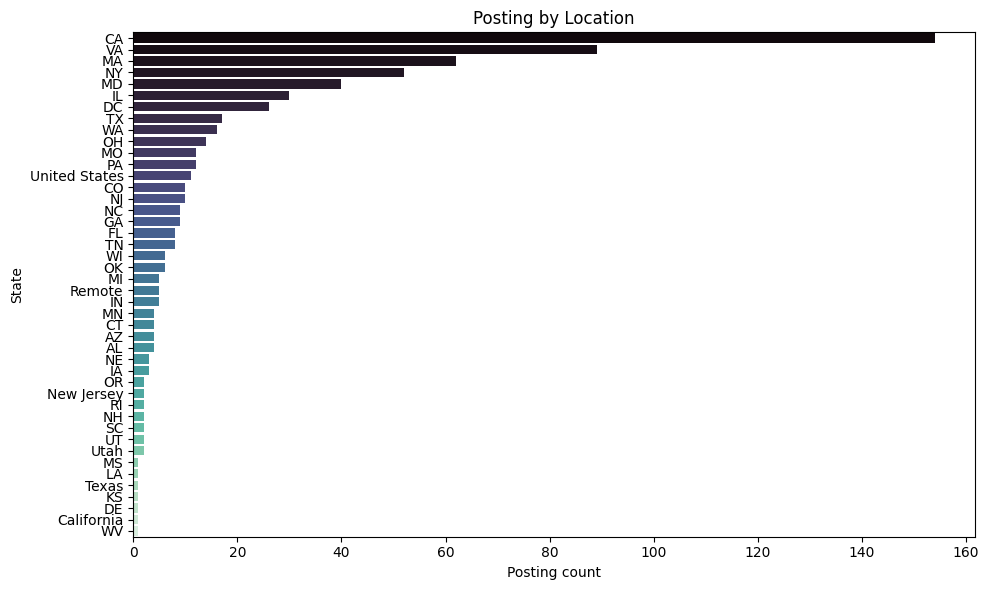

In [48]:
# Posting by Location
visualize_postings_by_column(df, 'job_state', 'Posting by Location', 'State')

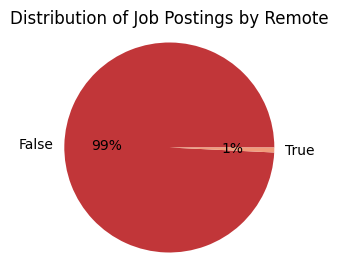

In [65]:
# Posting by remote
visualize_pie_chart_by_column(df, 'remote', 'Distribution of Job Postings by Remote')

In [58]:
df[df['Location'] == 'Remote']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,spark,aws,tableau,big data,r,power bi,bachelor,master,phd,remote
16,Data Scientist - Contract,137-171,"We are an ambitious, well-funded startup with ...",4.1,Upside Business Travel,Remote,"Washington, DC",51 to 200,Private,Internet,...,False,False,False,False,False,False,False,False,False,True
53,Jr. Data Engineer,75-131,Jr. Data Engineer\n\nJob Details\nLevel\nEntry...,4.8,IT Concepts,Remote,"Vienna, VA",51 to 200,Private,IT Services,...,False,False,False,False,False,False,False,False,False,True
134,Machine Learning Engineer,90-109,Role Description\nTriplebyte screens and evalu...,3.2,Triplebyte,Remote,"San Francisco, CA",51 to 200,Private,Computer Hardware & Software,...,False,False,False,False,False,False,False,False,False,True
199,Data Scientist - Contract,79-106,"We are an ambitious, well-funded startup with ...",4.1,Upside Business Travel,Remote,"Washington, DC",51 to 200,Private,Internet,...,False,False,False,False,False,False,False,False,False,True
305,Chief Scientist,145-225,Why TrueAccord?\n\nDebt collection is failing ...,3.4,TrueAccord,Remote,"San Francisco, CA",51 to 200,Private,Enterprise Software & Network Solutions,...,False,False,False,False,False,False,False,False,True,True


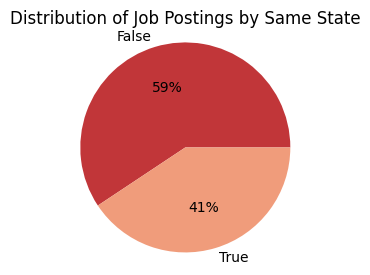

In [66]:
# Posting by same state
visualize_pie_chart_by_column(df, 'same_state', 'Distribution of Job Postings by Same State')

In [60]:
# Display all rows from the data frame.
pd.set_option('display.max_rows', None)

# Posting by state and job title simplification
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'Job Title', aggfunc = 'count')

Job Title
job_state job_simp                 
AL        data engineer           1
          data scientist          1
          na                      2
AZ        data engineer           1
          data scientist          2
          na                      1
CA        analyst                12
          data engineer          15
          data scientist        107
          manager                 4
          ml engineer             9
          na                      7
          vp                      1
CO        data scientist          9
          ml engineer             1
CT        data engineer           2
          data scientist          2
DC        analyst                 1
          data scientist         25
DE        data scientist          1
FL        data engineer           4
          data scientist          2
          na                      2
GA        data scientist          9
IA        analyst                 3
IL        analyst                 3
          data engineer           2
          data scientist         19
          ml engineer             3
          na                      3
IN        analyst                 2
          data engineer           1
          data scientist          1
          na                      1
KS        data scientist          1
LA        analyst                 1
MA        analyst                 1
          data scientist         37
          director                1
          manager                 1
          ml engineer             3
          na                     19
MD        analyst                 2
          data engineer           3
          data scientist         27
          na                      8
MI        data scientist          4
          manager                 1
MN        analyst                 3
          data scientist          1
MO        analyst                 1
          data engineer           2
          data scientist          9
MS        na                      1
NC        analyst                 1
          data engineer           1
          data scientist          1
          manager                 1
          ml engineer             2
          na                      3
NE        analyst                 1
          data scientist          2
NH        data scientist          1
          ml engineer             1
NJ        analyst                 1
          data scientist         10
          na                      1
NY        analyst                 1
          data engineer           4
          data scientist         41
          ml engineer             3
          na                      1
          vp                      2
OH        data engineer           2
          data scientist          9
          ml engineer             1
          na                      2
OK        analyst                 2
          na                      4
OR        data scientist          1
          ml engineer             1
PA        analyst                 4
          data scientist          5
          ml engineer             2
          na                      1
RI        director                2
SC        analyst                 1
          na                      1
TN        analyst                 2
          data scientist          5
          ml engineer             1
TX        analyst                 3
          data scientist         13
          na                      2
US        data engineer           1
          data scientist         10
UT        data engineer           1
          data scientist          3
VA        analyst                 8
          data engineer           5
          data scientist         66
          ml engineer             5
          na                      5
WA        analyst                 1
          data scientist         13
          ml engineer             2
WI        analyst                 1
          data scientist          4
          na                      1
WV        data scientist      

* **California**, **Virginia**, **Massachusetts**, **New York** and **Maryland** are top 5 states with the most jobs listing. In this, California is the state with the most job listing almsot double the amount that of Virginia which is the second biggest on the number of job listings.
* Almost jobs require employees to **work from office**. There are only 5 job postings labeled as remote. They are concentrated in the IT sector and mid-sized companies. However, we need to collect more data to better understand and analyze patterns.
* There is a relatively balanced distribution of job postings where the **job location is the same as the headquarters** and where it is **not the same as the headquarters**.

## Company

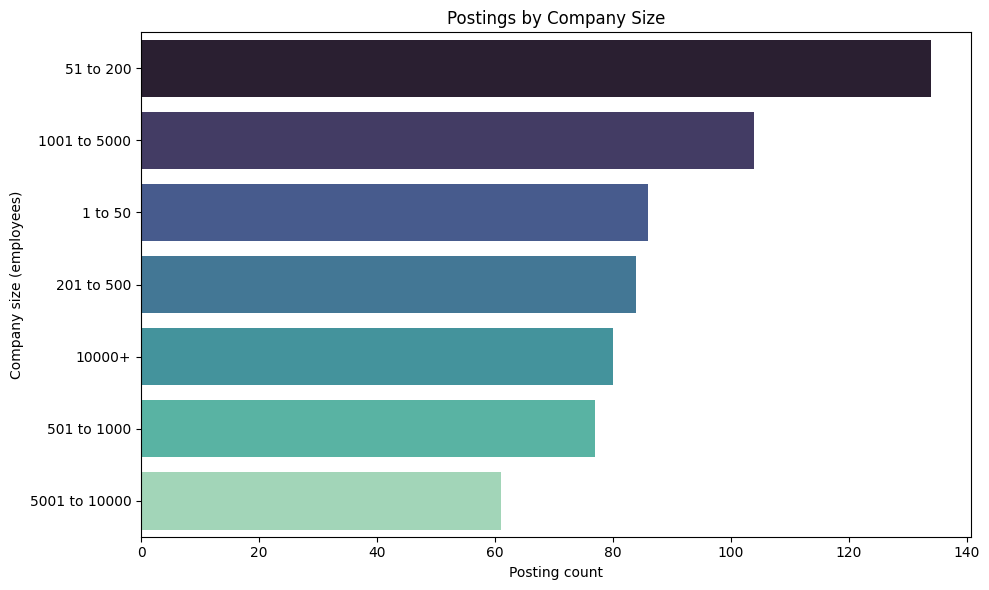

In [75]:
# Posting by Company Size
visualize_postings_by_column(df, 'Size', 'Postings by Company Size', 'Company size (employees)')

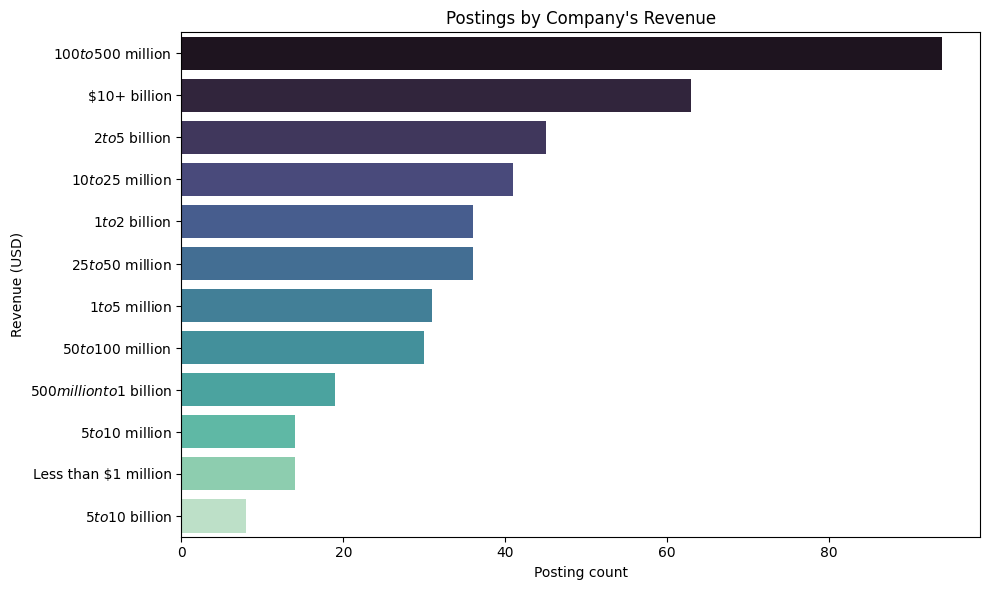

In [74]:
# Posting by Revenue
visualize_postings_by_column(df, 'Revenue', 'Postings by Company\'s Revenue', 'Revenue (USD)')

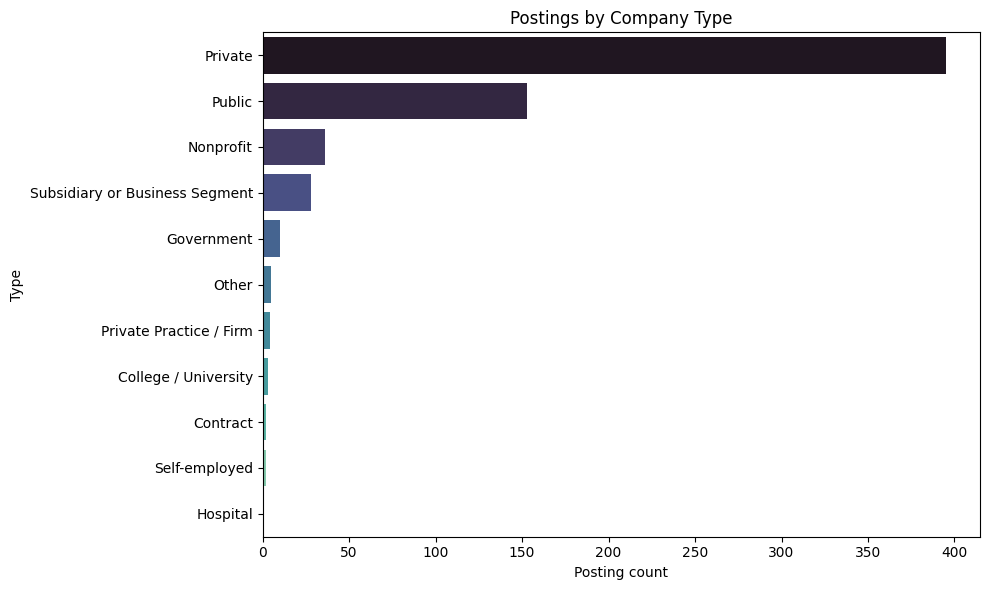

In [73]:
# Posting by Company Type
visualize_postings_by_column(df, 'Type of ownership', 'Postings by Company Type', 'Type')

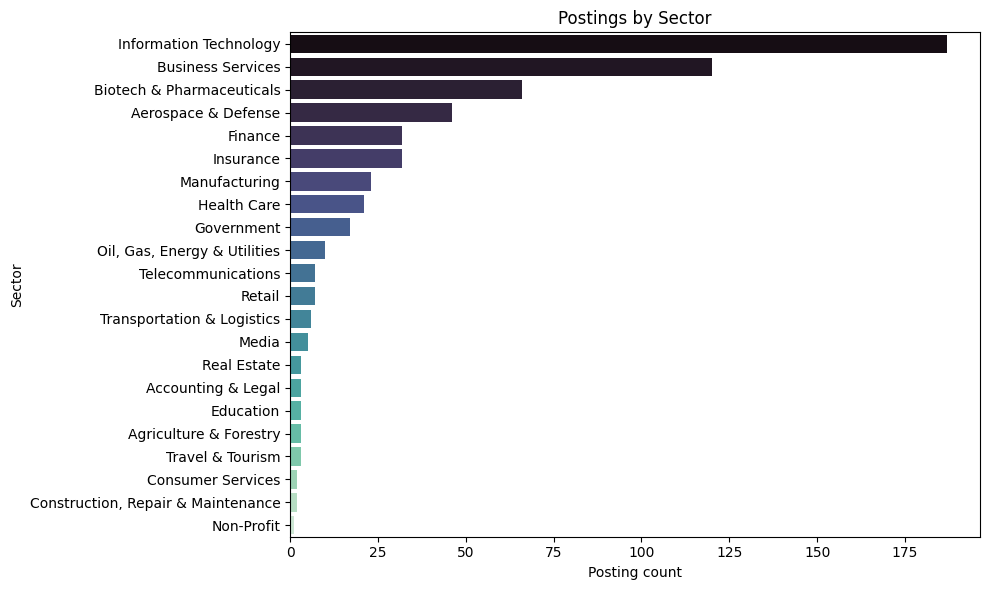

In [72]:
# Postings by Sector
visualize_postings_by_column(df, 'Sector', 'Postings by Sector', 'Sector')

In [76]:
# Posting by Sector, Industry
pd.pivot_table(df, index = ['Sector', 'Industry'], values = 'Job Title', aggfunc = 'count', sort = True).sort_values(by = 'Job Title')

Job Title
Sector                             Industry                                           
Non-Profit                         Social Assistance                                 1
Travel & Tourism                   Hotels, Motels, & Resorts                         1
Agriculture & Forestry             Farm Support Services                             1
Media                              Publishing                                        1
Transportation & Logistics         Transportation Management                         1
                                   Shipping                                          1
                                   Rail                                              1
                                   Logistics & Supply Chain                          1
Government                         State & Regional Agencies                         1
Telecommunications                 Telecommunications Manufacturing                  1
                                   Cable, Internet & Telephone Providers             1
Media                              News Outlet                                       1
Retail                             Food & Beverage Stores                            1
                                   Department, Clothing, & Shoe Stores               1
Finance                            Venture Capital & Private Equity                  2
Retail                             Consumer Electronics & Appliances Stores          2
Finance                            Financial Transaction Processing                  2
Travel & Tourism                   Travel Agencies                                   2
Consumer Services                  Health, Beauty, & Fitness                         2
Oil, Gas, Energy & Utilities       Oil & Gas Services                                2
Transportation & Logistics         Express Delivery Services                         2
Agriculture & Forestry             Timber Operations                                 2
Manufacturing                      Transportation Equipment Manufacturing            2
Construction, Repair & Maintenance Construction                                      2
Accounting & Legal                 Accounting                                        3
Oil, Gas, Energy & Utilities       Utilities                                         3
Real Estate                        Real Estate                                       3
Manufacturing                      Miscellaneous Manufacturing                       3
Retail                             Other Retail Stores                               3
Media                              Video Games                                       3
Manufacturing                      Industrial Manufacturing                          3
                                   Chemical Manufacturing                            3
                                   Electrical & Electronic Manufacturing             3
Business Services                  Architectural & Engineering Services              3
                                   Wholesale                                         3
Education                          Colleges & Universities                           3
Insurance                          Insurance Agencies & Brokerages                   4
Manufacturing                      Food & Beverage Manufacturing                     4
                                   Consumer Products Manufacturing                   5
Telecommunications                 Telecommunications Services                       5
Oil, Gas, Energy & Utilities       Energy                                            5
Finance                            Lending                                           7
                                   Banks & Credit Unions                             8
                                   Investment Banking & Asset Management            13
Government                         Federal Agencies                        

* Job opportunities exist across a spectrum of company sizes, from small businesses to large corporations.
* **Mid-size companies** (51-200 employees) are hiring the most data positions.
* Companies with revenues **between \$100M-\$500M** have the most job postings, followed by **$10+B** companies.
* **Private companies** are taking the lead in hiring data positions, followed by **public** and **nonprofit companies**.
* **IT**, **business services**, **biotech**, **aerospace & defense**, **finance**, and **insurance** top the list of the most popular job by sectors.
* **Biotech**, **IT services**, **computer hardware & software**, **aerospace & defense** and **enterprise software & network solutions** companies are the top 5 most in demand industries.

## Job requirements

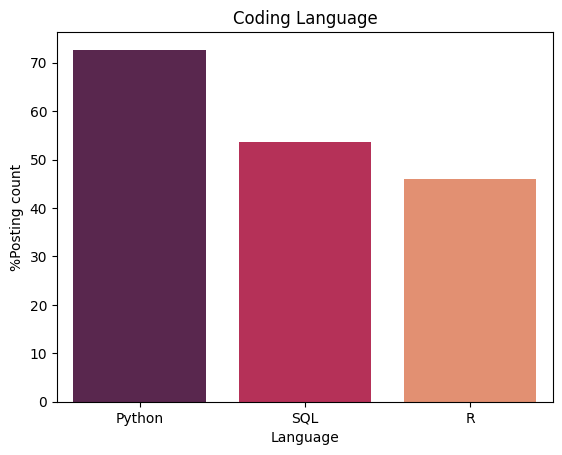

In [70]:
# Coding languages
langs = ['SQL', 'Python', 'R']
visualize_skills(langs, df, 'Coding Language', 'Language')

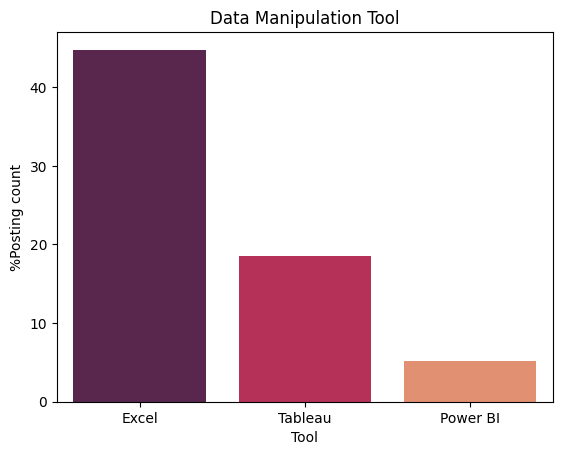

In [69]:
# Data manipulation tools
tools = ['Excel', 'Tableau', 'Power BI']
visualize_skills(tools, df, 'Data Manipulation Tool', 'Tool')

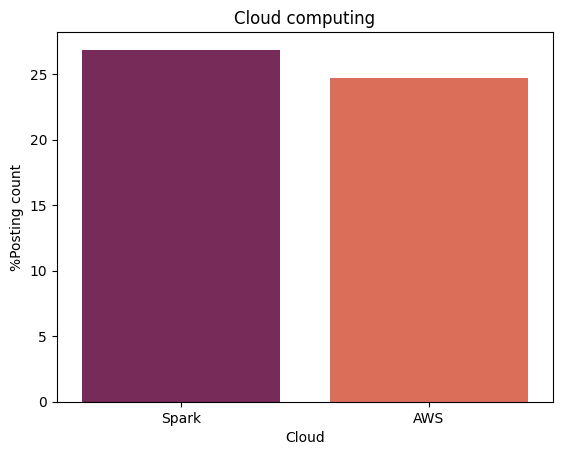

In [68]:
# Cloud computing
cloud = ['AWS', 'Spark']
visualize_skills(cloud, df, 'Cloud computing', 'Cloud')

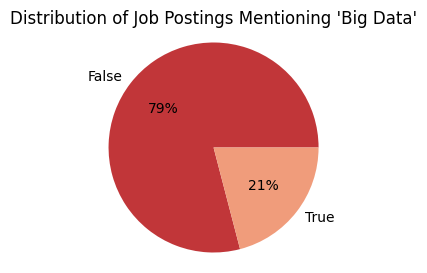

In [67]:
# Big data
visualize_pie_chart_by_column(df, 'big data', 'Distribution of Job Postings Mentioning \'Big Data\'')

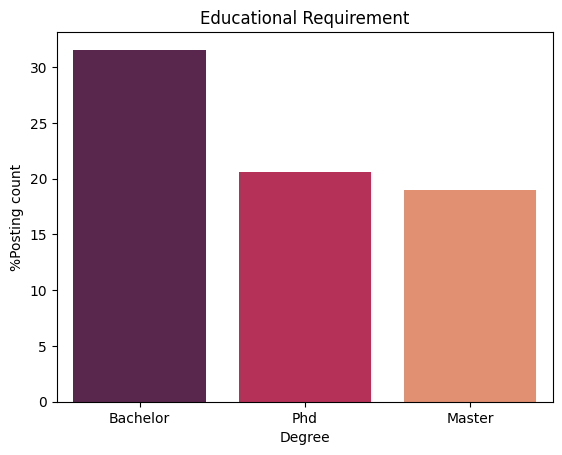

In [77]:
# Posting by degree
degrees = ['Bachelor', 'Phd', 'Master']
visualize_skills(degrees, df, 'Educational Requirement', 'Degree')

* **Python** and **SQL** are mentioned in over 50% of the job postings. **R** is also in high demand being asking for about 45% of the time.
* For data manipulation tools, **Excel** is mentioned in about 45% of the total job posting. Next is **Tableau** at 18% and **Power BI** at 5%.
* For cloud computing, **Spark** and **AWS** are both mentioned around 25%.
* About 21% of postings metion **big data** in their descriptions. Therefore, big data may not be a primary requirement for the majority of the data related jobs.
* Over 30% of postings mention in **bachelor** and around 20% mention in **PhD** and **master** degrees.

## Salary

In [78]:
df['avg_salary'].mean()

123.76555386949924

In [79]:
# Check the highest potential salary
df.loc[df['max_salary'] == df['max_salary'].max(), ['max_salary', 'job_simp']].sort_values(by = 'job_simp')

,max_salary,job_simp
508,331,data scientist
525,331,data scientist
524,331,data scientist
521,331,data scientist
520,331,data scientist
527,331,data scientist
517,331,data scientist
528,331,data scientist
514,331,data scientist
513,331,data scientist


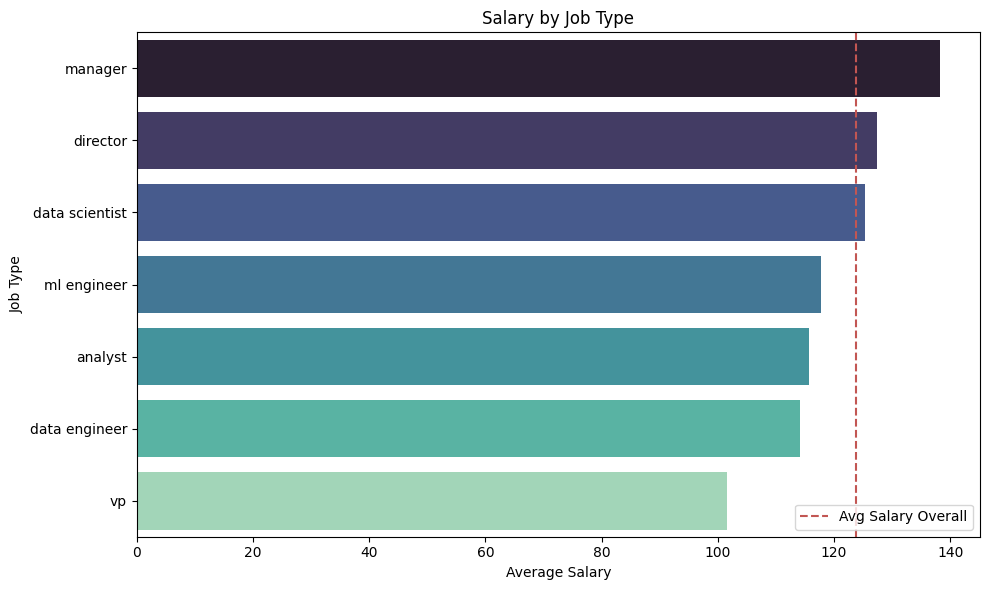

In [80]:
# Salary by Job Type
visualize_avg_salary_by_column(df, 'job_simp', 'Salary by Job Type', 'Job Type')

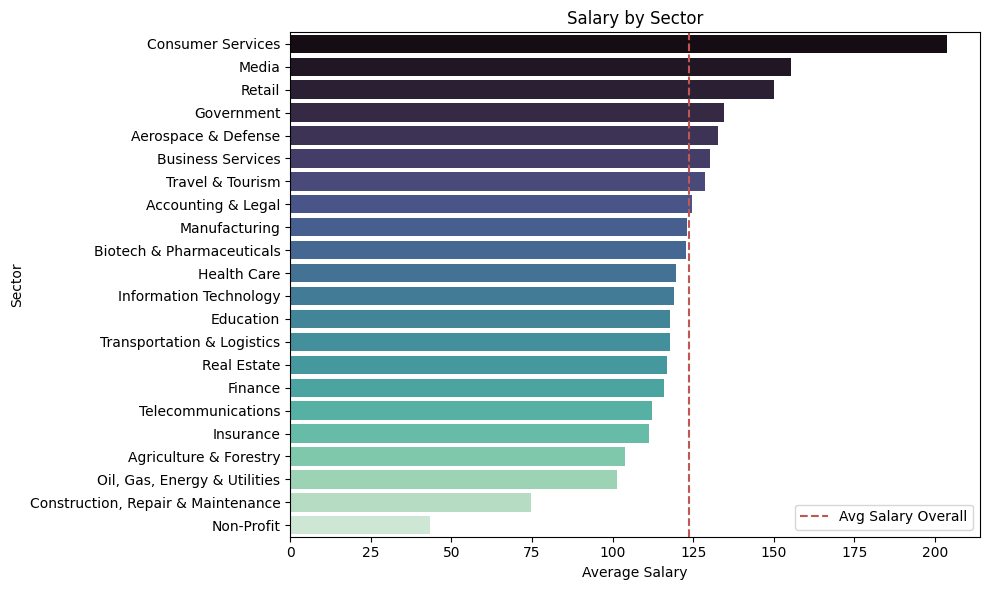

In [81]:
# Salary by Sector
visualize_avg_salary_by_column(df, 'Sector', 'Salary by Sector', 'Sector')

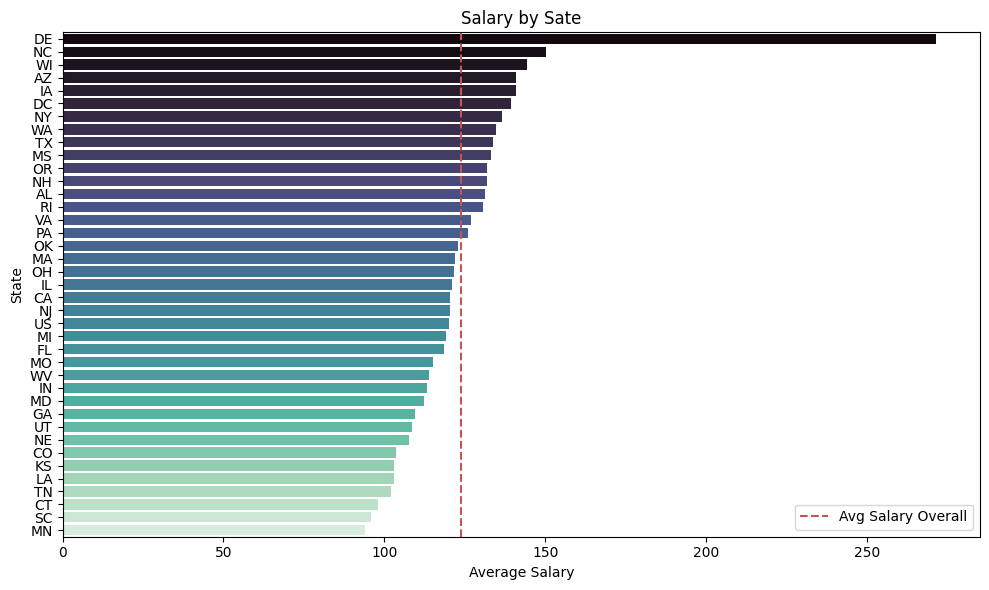

In [82]:
# Salary by State
visualize_avg_salary_by_column(df, 'job_state', 'Salary by Sate', 'State')

In [83]:
df[df['job_state'] == 'DE']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,spark,aws,tableau,big data,r,power bi,bachelor,master,phd,remote
509,"Real World Science, Data Scientist",212-331,"Title: Real World Science, Data Scientist\nLoc...",4.0,AstraZeneca,"Wilmington, DE","Cambridge, United Kingdom",10000+,Public,Biotech & Pharmaceuticals,...,False,False,False,False,True,False,False,False,True,False


* Average expected salary is about $123.8K
* **Manager**, **director**, and **data scientist** are on the average pays more than the others data related jobs (\$331K). Among these, data scientists occupy the majority of the top positions with the highest salaries.
* The most highest potential earning position may be **data scientist**, **manager** or **ML engineer**.
* **Consumer services**, **media**, **retail**, **goverment**, and **aerospace & defense** tend to offer the highest average salaries, which could be due to the nature of the roles within these sectors or the demand for specific skills.Only **aerospace & defense** is in both the top 5 highest-paid sectors and the top 5 high-demand sectors. On the other hand, the **non-profit** sector appears to have the lowest average salary among the sectors listed.
* **Delaware** has the highest average salary, but there is only 1 job posting here. Therefore, this figure may be biased. **North Carolina**, **Wisconsin**, and **Arizona** offer higher average salaries than the other states.

# Make recommendations

* If you're looking for a data scientist position, your best bet is somewhere near one of the larger state, such us California, Virginia , Massachusetts, New York,  and Maryland. These states seem to have a higher demand for data scientists.
* It's a good idea to consider filter companies located near where you live since there is not a high demand for remote jobs.
* You also should focus your job search on medium-sized private companies. They may be the top hiers.
* IT, business services, biotech, aerospace & defense, finance, and insurance top the list of the most popular job by sectors. If you have a hybrid skill set with experience in one of these domains, it creates an opportunity for yourself.
* For beginner, you should learn Python/ R, SQL and Excel first. These skills mentioned in more than 40% of posting.
* The average pay for a data scientist is around $125k. However, there are many factors impact your salary, for example: sector, location of company, position, your skills and knowleadge.